In [3]:
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd

Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src\nwb4fp\analyses\examples\tracking_plot.py:5: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


In [2]:
cd Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src

Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src


here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

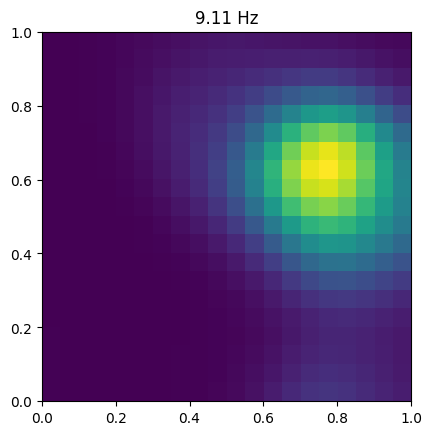

<Figure size 600x600 with 0 Axes>

In [13]:
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
## unit11: unit_num = 8, ch = 13
filepath = r"S:\Sachuriga/nwb/65165_2023-07-03_16-21-48_A_phy_k_manual.nwb"
npdata = nap.load_file(filepath)
npdata

## Load data
pos_cord = load_speed_fromNWB(npdata['XY_mid_brain'])


## filter speed
raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.05)

## filter spikes with speed
unit_num=2
raw_pos=combined_array
# ## filter spikes with speed
# spk = speed_filtered_spikes(spikes_time,
#                             pos_cord[:,0], # times
#                             mask)
#for i in range(40):
spikes_time = load_units_fromNWB(npdata['units'], unit_num = unit_num)
spk = speed_filtered_spikes(spikes_time,
                            raw_pos[:,0])
plot_ratemap(raw_pos[:,1], # x
            raw_pos[:,2], # y
            raw_pos[:,0], # times
            spikes_time ,
            box_size=[1.0, 1.0], 
            bin_size=0.05,
            smoothing=0.1)


x_input = npdata['units']['x'][unit_num]
y_input = npdata['units']['y'][unit_num]

In [14]:
ch_num = unit_location_ch(x_input=x_input,y_input=y_input)

Loaded channel_groups: {0: {'channels': [26, 25, 20, 19, 14, 8, 5, 4, 3, 0], 'geometry': {26: [16.5, 105.0], 25: [0.0, 0.0], 20: [0.0, 90.0], 19: [16.5, 135.0], 14: [16.5, 45.0], 8: [0.0, 60.0], 5: [16.5, 75.0], 4: [16.5, 15.0], 3: [0.0, 120.0], 0: [0.0, 30.0]}}, 1: {'channels': [30, 24, 22, 21, 17, 16, 9, 10, 6, 2, 1], 'geometry': {30: [216.5, 45.0], 24: [200.0, 90.0], 22: [200.0, 30.0], 21: [216.5, 75.0], 17: [216.5, 135.0], 16: [200.0, 120.0], 9: [216.5, 15.0], 10: [200.0, 60.0], 6: [216.5, 105.0], 2: [200.0, 150.0], 1: [200.0, 0.0]}}, 2: {'channels': [29, 28, 31, 27, 23, 18, 15, 13, 12, 11, 7], 'geometry': {29: [400.0, 30.0], 28: [416.5, 75.0], 31: [400.0, 120.0], 27: [400.0, 150.0], 23: [400.0, 90.0], 18: [416.5, 135.0], 15: [400.0, 60.0], 13: [400.0, 0.0], 12: [416.5, 105.0], 11: [416.5, 45.0], 7: [416.5, 15.0]}}, 3: {'channels': [33, 32, 45, 40, 36, 53, 50, 48, 47, 58, 56], 'geometry': {33: [600.0, 30.0], 32: [616.5, 75.0], 45: [600.0, 90.0], 40: [616.5, 15.0], 36: [600.0, 150.0

In [15]:
import nwb4fp.analyses.maps as mapp

## get rate_maps
maps = mapp.SpatialMap(box_size=[1.0, 1.0], 
                       bin_size=0.05,
                       smoothing=0.1)

## generate ratemaps
rate_map = maps.rate_map(raw_pos[:,1], 
                        raw_pos[:,2], 
                         raw_pos[:,0], 
                         spikes_time)

## get_fileds with center of the files
fields = separate_fields_by_laplace(rate_map, 
                                    minimum_field_area=9)
fiesld_afremoval = remove_fields_by_area(fields, minimum_field_area=9)
bc = calculate_field_centers(rate_map, fiesld_afremoval, center_method='maxima')
v = get_filed_num(fiesld_afremoval)

## get the center of the fields
for field_nums in v:
    y_c = bc[field_nums-1][0]
    x_c = bc[field_nums-1][1]

[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0]]


In [16]:
## crosssings
f = which_field(raw_pos[:,1],raw_pos[:,2],fiesld_afremoval,[1.0,1.0])

in_field = np.where(f==1)[0]
indices = np.zeros(len(pos_cord[:,1]))
indices[in_field]=1

en,ex = compute_crossings(indices)
filter_loger_runs = ex-en
filtered_enter = en[filter_loger_runs>9]
filtered_exit = ex[filter_loger_runs>9]
print(ex)

restrcir_en=[]
restrcir_ex=[]

for i in range(len(filtered_enter)):
    if np.mean(smoothed_speed[en[i]:ex[i]]) >= 0.1:
        restrcir_en.append(en[i])
        restrcir_ex.append(ex[i])
print( restrcir_ex)
## infields cords
pos_cord=raw_pos
xf = pos_cord[:,1][in_field]
yf = pos_cord[:,2][in_field]
tf = pos_cord[:,0][in_field]#
spk_in = spk[in_field-1]

#Exatract LFP
lfp_times = npdata['lfp_times']
lfp = npdata['lfp_raw']


[ 2737  3123  3575  5684  6964  6979  8255  8691  9515 16796 16819 21362
 21376 22530 22557 23664 26043 27935 30041 30878 32748 33837 34390 34910
 36416 37304 37567 38151 40168 40660 44138 44753 45497 46353 46807 47476
 49771 50319 50930 52335 53726 55653 57533 60150 60394 60566 60742 63113
 63495 64902 66017 66059 66118 66747 66810 66820 66909 66915 67655 68309
 68706 68958]
[2737, 3123, 3575, 5684, 6964, 6979, 8255, 8691, 9515, 16796, 16819, 21362, 21376, 22530, 26043, 27935, 30041, 30878, 32748, 33837, 34390, 34910, 36416, 37304, 37567, 38151, 40168, 40660, 44138, 44753, 45497, 46353, 46807, 47476, 49771, 50319, 50930, 52335, 53726, 55653, 57533, 60150, 60394, 60566, 60742, 63113, 63495, 66017]


In [17]:
import numpy as np
from scipy import signal
from scipy.signal import hilbert
import matplotlib.pyplot as plt

fs = 1000
# 1. 带通滤波 (6-11 Hz)
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)  # 前后向滤波，避免相位移
    return y

lfp_filtered = bandpass_filter(lfp[:,ch_num[0]], 5, 12, fs)

# 2. 使用希尔伯特变换计算瞬时相位
analytic_signal = hilbert(lfp_filtered)

# 计算相位（弧度）
phase_rad = np.angle(analytic_signal)

# 展开相位，避免-π到π的跳跃
phase_rad_unwrapped = np.unwrap(phase_rad)

# 转换为角度
phase_deg = phase_rad_unwrapped * (180 / np.pi)

# 调整到0°到720°范围（取决于信号长度和周期）
# 如果需要限制在0°到720°，可以用模运算或其他逻辑
theta_phase = phase_deg % 360 # 取模720，或者根据需求自定义

ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

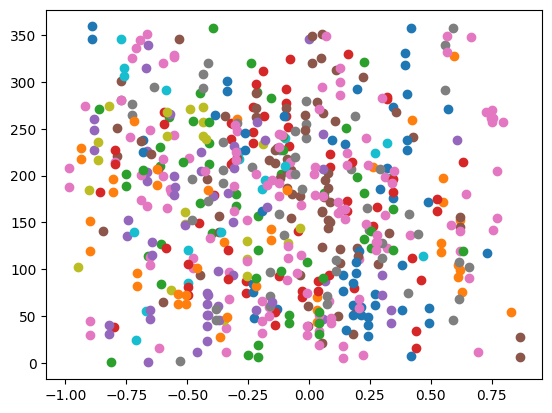

In [18]:
x = pos_cord[:,1]
y = pos_cord[:,2]
t = pos_cord[:,0]



fig, ax3 = plt.subplots()
full_phase=[]
full_x=[]
for slide_s,slide_stop in zip(restrcir_en, restrcir_ex):
    #plot_path(x[slide_s:slide_stop],y[slide_s:slide_stop],t[slide_s:slide_stop],box_size=1,spike_times = spikes_time, ax=ax3)
    r, theta, pdcd, pdmd = map_pass_to_unit_circle(x[slide_s:slide_stop],y[slide_s:slide_stop],t[slide_s:slide_stop], x_c/20, y_c/20, field=fiesld_afremoval, box_size=[1.0, 1.0])
    phase_value=[]

    temp_time = t[slide_s:slide_stop]
    temp = spikes_time[spikes_time>t[slide_s]]
    temp1 = temp[temp<=t[slide_stop-1]]
    phase_value=[]
    pdcd_temp = []
    if len(temp1)>0:
        for t1 in temp1:
            index_run = np.searchsorted(temp_time, t1)
            index_theta = np.searchsorted(lfp_times, t1)
            phase_value.append(theta_phase[index_theta])
            pdcd_temp.append(pdcd[index_run-1])
            full_phase.append(theta_phase[index_theta])
            full_x.append(pdcd[index_run-1])
        ax3.scatter(pdcd_temp,phase_value)
            

Phase zero (minimum firing phase): 47°


(-1.0, 1.0)

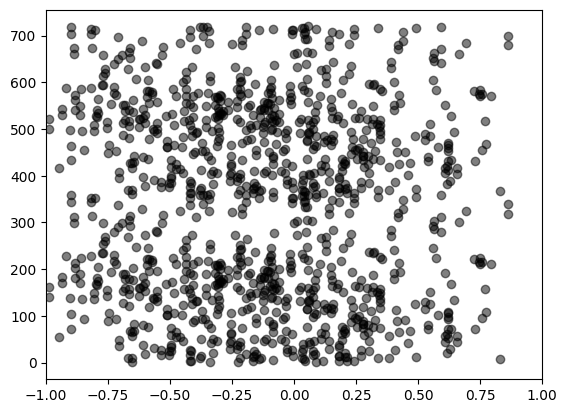

In [19]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

# 步骤 1：将尖峰分到1°的bin中
bins = np.arange(0, 360, 1)  # 360个bin，从0°到359°
hist, bin_edges = np.histogram(full_phase, bins=bins, range=(0, 360))

# 步骤 2：用圆形高斯滤波器平滑
# 因为是循环数据，重复首尾以处理边界
hist_circular = np.concatenate([hist[-180:], hist, hist[:180]])  # 扩展数据
sigma = 45  # 标准差45°
hist_smoothed = gaussian_filter1d(hist_circular, sigma=sigma)  # 平滑

# 步骤 3：找到最小尖峰数的相位
min_phase_idx = np.argmin(hist_smoothed)  # 最小值的索引
phase_zero = bins[min_phase_idx]  # 定义为相位零点
print(f"Phase zero (minimum firing phase): {phase_zero}°")

# 可选：调整相位（如果需要）
# 如果想把所有相位相对于 phase_zero 重新定义
adjusted_phases = (full_phase - phase_zero) % 360

fig, ax4 = plt.subplots()
ax4.scatter(full_x,adjusted_phases,c='k', alpha=0.5)

ax4.scatter(full_x,adjusted_phases+360,c='k', alpha=0.5)
plt.xlim(-1, 1) 
            


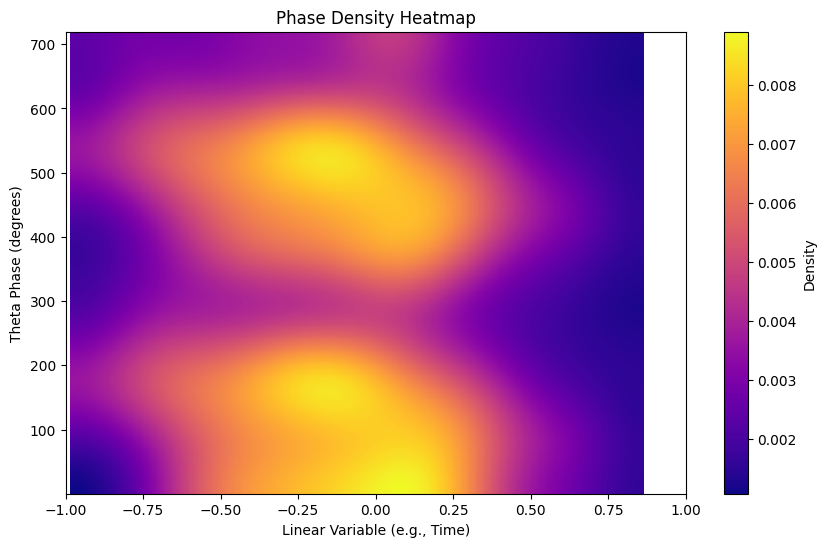

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# 计算二维直方图
#x_bins = np.linspace(min(lin_x), max(lin_x), 50)  # x轴分成50个bin
#y_bins = np.linspace(0, 360, 50)  # 相位分成50个bin（0°-360°）
full_x_stacked = np.hstack([full_x, full_x])
full_adjusted_phases = np.hstack([adjusted_phases, adjusted_phases+360])
heatmap, xedges, yedges = np.histogram2d(full_x_stacked,full_adjusted_phases, bins=[500, 500])

# 可选：平滑热图（可选，去掉注释使用）
from scipy.ndimage import gaussian_filter
heatmap = gaussian_filter(heatmap, sigma=40)

# 绘制热图
plt.figure(figsize=(10, 6))
plt.pcolormesh(xedges, yedges, heatmap.T, cmap='plasma')  # heatmap.T转置以匹配方向
plt.colorbar(label='Density')  # 添加颜色条表示密度
plt.xlabel('Linear Variable (e.g., Time)')
plt.ylabel('Theta Phase (degrees)')
plt.title('Phase Density Heatmap')
plt.xlim(-1, 1) 
plt.show()
